<a href="https://colab.research.google.com/github/nelslindahlx/Data-Analysis/blob/master/Covid19_forecast_with_Prophet_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example #1: Forecast using NYTimes live data on GitHub

Install fbprophet using pip

In [20]:
!pip3 install fbprophet

We need to import pandas, numpy, matpoltlib, and Prophet

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet

We need to grab some data. Let's use the NYT Covid dataset from GitHub

In [22]:
# url="https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv"
# df=pd.read_csv(url)
covid_df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv', index_col='date',parse_dates=True)
covid_df.head()

,cases,deaths
date,,
2020-01-21,1,0
2020-01-22,1,0
2020-01-23,1,0
2020-01-24,2,0
2020-01-25,3,0


To use Prophet we have to rename the columns to "ds" and "y" or it will be unhappy

In [23]:
df = covid_df.reset_index()
df.head()
df=df.rename(columns={'date':'ds', 'cases':'y'})
# df=df.rename(columns={'date':'ds', 'deaths':'y'})
df.head()

,ds,y,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0


In [24]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


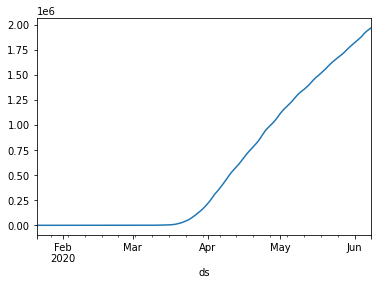

In [25]:
df.set_index('ds').y.plot()

# Example #2: Forecast using NYTimes live data on GitHub

We need to import pandas and Prophet

In [0]:
import pandas as pd
from fbprophet import Prophet

This grabs the live data from the NY Times GitHub

In [0]:
url="https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv"
df=pd.read_csv(url)

This sets the period to forecast

In [0]:
period_to_forecast = 45

For Prophet to work we need to ensure columns are named "ds" and "y"

In [0]:
df.rename(columns={"date": "ds", "cases": "y"},inplace=True) 
df['ds'] = pd.to_datetime(df['ds'],infer_datetime_format=True)
df = df[df['ds']>"2020-02-01"]
df['y'] = df['y'].astype(int)
df = df[['y','ds']]

Need to run Prophet and execute a graph

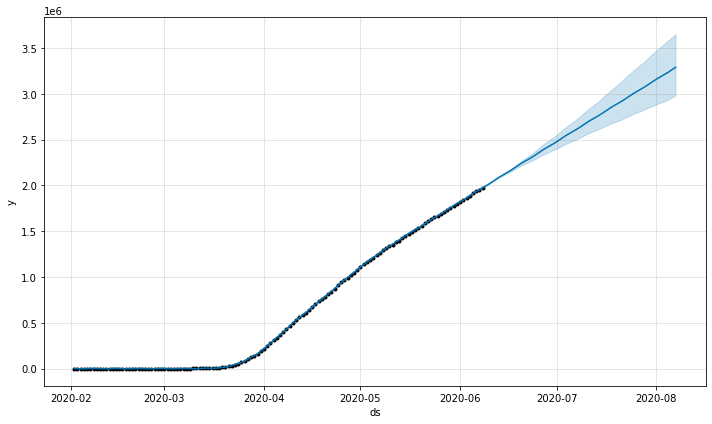

In [19]:
pred = Prophet(yearly_seasonality=False, daily_seasonality=False)
pred.fit(df)
future = pred.make_future_dataframe(periods=60)
forecast = pred.predict(future)
graph = pred.plot(forecast)